# ML Exercise 1 - Linear Regression

To help you start with Python and NumPy, there is a great tutorial online,
created at Stanford. It can be downloaded as a notebook at https://github.com/kuleshov/cs228-material/tree/master/tutorials/python. Note that this tutorial is written in Python 2.7.


<font color='red'> PLEASE DO NOT HESITATE to include your remarks/comments (in colors of your choice) in the notebook. That will be considered as a short report.</font>

In [166]:
# Change here using your first and last names
fn1 = "Othmane"
ln1 = "BELARBI"
fn2 = "Chaimae"
ln2 = "EL RHARI"

filename = "_".join(map(lambda s: s.strip().lower(), 
                        ["tp1", ln1, fn1, "and", ln2, fn2])) + ".ipynb"
print(filename)

tp1_belarbi_othmane_and_el rhari_chaimae.ipynb


## Part 1: Linear regression with one variable

You will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

<font color='red'> PLEASE READ CAREFULLY this. When you open a notebook (ipython) with google colab, you create a new working session. If you want that your "created session" can see your data in your google drive, you need to "mount" the drive and include the correct path to your data. Do not worry, the following code will do that. When call drive.mount, you need to authorize: click the link, copy the authorization code,...


You can run some basic commands like "pwd, ls" using "!pwd, or !ls"
</font>

In [167]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [168]:
!pwd
import os
# TODO: change the correct path
os.chdir('/content/drive/My Drive/option IA/TP1 ML/')
!pwd

/content/drive/My Drive/option IA/TP1 ML
/content/drive/My Drive/option IA/TP1 ML


In [169]:


# TODO: change the correct path, you may need to create a "data" folder in your drive
!wget https://www.dropbox.com/s/us61lvxcjnn1n3j/ex1data1.txt?dl=0 \
   -O /content/drive/My\ Drive/option\ IA/TP1\ ML/data/ex1data1.txt

--2020-02-09 00:01:59--  https://www.dropbox.com/s/us61lvxcjnn1n3j/ex1data1.txt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/us61lvxcjnn1n3j/ex1data1.txt [following]
--2020-02-09 00:02:00--  https://www.dropbox.com/s/raw/us61lvxcjnn1n3j/ex1data1.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc889730e91d3866509fc1d90f36.dl.dropboxusercontent.com/cd/0/inline/AxthH3C2B5WlcSbSipRNWF0h4UdNl4iS5ezwLJTzD0jTtF06B0-bC9sqf9rblhUMP-6FUFnVNPzawZhZDR_PRCm9SkDL4hmKDUbUdJCKLCoAfg/file# [following]
--2020-02-09 00:02:00--  https://uc889730e91d3866509fc1d90f36.dl.dropboxusercontent.com/cd/0/inline/AxthH3C2B5WlcSbSipRNWF0h4UdNl4iS5ezwLJTzD0jTtF06B0-bC9sqf9rblhUMP-6FUFnVNPzawZhZDR_PRCm9SkDL4hmKDUbUdJCKLCoAfg/file
Resolving uc88

In [170]:
# Check your current folder
!pwd

/content/drive/My Drive/option IA/TP1 ML


# 1. Importe some libraries and examine the data.

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
path = os.getcwd() + '/data/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233

In [172]:
data.describe()

Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000

#Plot it to get a better idea of what the data looks like.

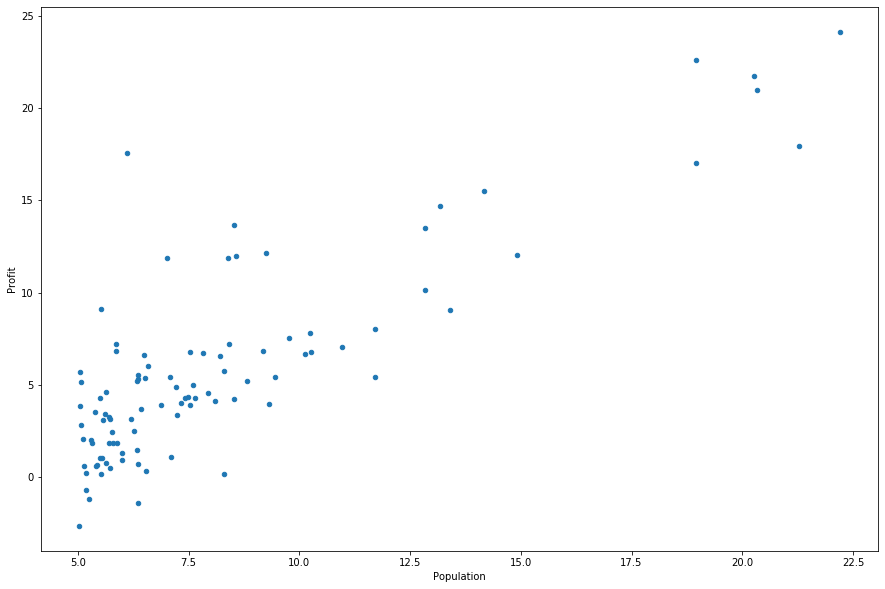

In [173]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(15,10))

#data.T.plot.scatter(x = 'Population', y = 'Profit')

#2. TO DO: fit the linear regression parameters $\mathbf{w}$ to your dataset using gradient descent. 

You suppose that your relation between your data $x$ and target $t$ can be modeled by a linear mode 

$y(x,\mathbf{w})= w_0+w_1x$ \\
The objective of linear regression is to minimize the cost function:

$E(\mathbf{w})=\displaystyle \frac{1}{2N} \sum_{n=1}^{N} \{y(x_n,\mathbf{w})-t_n\}^2 $ \\



$N$ is the number of samples in the data set.


<font color='red'> Question: in this dataset, $N= ?$ </font> 

<font color='green'> $N = 97$ </font>

Your model parameters are the $w_j$ values which you will adjust to minimize cost $E(\mathbf{w})$. 
One solution is the batch gradient descent algorithm. In batch gradient descent,each iteration performs the update:

$\mathbf{w}=\displaystyle \mathbf{w} - \eta \frac{1}{N} \sum_{n=1}^{N} \{y(x_n,\mathbf{w})-t_n\}x_n$

With each step of gradient descent, your parameters $w_j$ come closer to the optimal values that will achieve the lowest cost $E(\mathbf{w})$.

<font color='red'> Question: how many parameters $w$ do you have to find for this dataset. </font> 

<font color='green'>We have to find $w_0$ and $w_1$ </font> 

**Exercise:** Implement linear regression using gradient descent to minimize the cost function.  

<font color='red'>TODO: Create a function to compute the cost of a given solution (characterized by the parameters w). </font> 
Functions like power, sum of numpy may be useful.

**Implementation Note:** We store each example as a row in the the $X$ matrix in Python `numpy`. To take into account the term $w_0$, we will add an additional first column to $X$ and set it to all ones. This allows us to treat $w_0$ as simply another 'feature'.

In [0]:
def computeCost(X, t, w):
    #X : array_like
    #    input dataset of shape (N x D+1), N: number of examples, D: the number of features. 
    
    #t : array_like
    #    target of shape (N, ).
    
    #w : array_like
    #    parameters of shape (D+1, ).
    
    # Note that * is elementwise multiplication, unlike Matlab,
    # you may need to use it 
    # then using np.sum...

    # you can use np.dot
    # WRITE YOU CODE HERE
    N = X.shape[0]
    y = np.dot(X,w.T)
    E = np.sum(np.square(y-t))/(2*N)

    return E

#3. Do some data preparation.
<font color='red'>TODO: get X (training data) (first column) and t (target variable) (last column) from "data". </font>

In [0]:
# set X (training data) and t (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
t = data.iloc[:,cols-1:cols]

In [176]:
X.head()

Population
0      6.1101
1      5.5277
2      8.5186
3      7.0032
4      5.8598

In [177]:
data.describe()

Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000

In [178]:
t.head()

Profit
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233

Take a look to make sure X (training set) and t (target variable) look correct.

Let's add a column of ones to the X (use X.insert

*   Élément de liste
*   Élément de liste

(0, 'Ones', 1)).

<font color='red'>Question: why do you need to do this? (hint: related to $w_0$)</font>

<font color='green'> Sachant que $y(x_n,w)$ est issue du produit matricielle entre $X$ et $w^T$, il faut ajouter une colonne de 1 afin d'avoir le $w_0$ tout seul dans l'équation $y(x_n,w)=w_0+w_1x$.  </font>

In [179]:
X.insert(0, 'Ones',1)
X.head()

Ones  Population
0     1      6.1101
1     1      5.5277
2     1      8.5186
3     1      7.0032
4     1      5.8598

The cost function is expecting numpy matrices so we need to convert X and t before we can use w (use np.matrix...). We also need to initialize w. <font color='red'>Question: explain the shape of w?</font> 
<font color='green'> On sait que $y(x_n,w)=w^TX$. Or $X$ est de taille (97,2) et on souhaite avoir $y(x_n,w)$ de la même taille que $t$ cad (1,97). A fortiori, il est nécessaire que $w$ soit de taille (1,2)   </font> 

In [0]:
X = np.matrix(X.values)
t = np.matrix(t.values)
w = np.matrix(np.array([0,0]))

Here's what w looks like.

In [181]:
w

matrix([[0, 0]])

Let's take a quick look at the shape of our matrices.
(expected result: ((97, 2), (1, 2), (97, 1))

In [182]:
X.shape, w.shape, t.shape

((97, 2), (1, 2), (97, 1))

Now let's compute the cost for our initial solution (0 values for w).

In [183]:
computeCost(X, t, w)

32.072733877455676

Expected result 32.072733877455676. So far so good. 

<font color='red'>Exercise: Define a function to perform gradient descent on the parameters w using the update rules defined in the text.</font>





Functions like multiply, sum of numpy may be useful.

In [0]:
def gradientDescent(X, t, w, eta, iters):
    
  """
  X : array_like
      input dataset of shape (N x D+1), N: number of examples, D: the number of features. 
    
  t : array_like
      target of shape (N, ).
    
  w : array_like
        parameters of shape (D+1, ).
  """
  # make a copy of w, to avoid changing the original array
  w_t = w.copy()
  cost = np.zeros(iters)
  N = X.shape[0]
  
  for i in range(iters):
    #you need to modify w
    y = np.dot(X,w_t.T)
    diff = y-t
    z = np.multiply(diff, X)
    dw_t =  np.sum(z, axis = 0) / N

    w_t = w_t - eta*dw_t
    cost[i] = computeCost(X, t, w_t) # you should stock the cost function for each epoch
                                   # this is useful for checking whether the cost reduces...
  return w_t, cost

Initialize the learning rate eta and the number of iterations to perform.


<font color='red'>Are they parameters or hyper-parameters?</font>

In [0]:
eta = 0.01
iters = 1000

Now let's run the gradient descent algorithm to fit our parameters eta to the training set.

In [186]:
w_t, cost = gradientDescent(X, t, w, eta, iters)
w_t

matrix([[-3.24140214,  1.1272942 ]])

Expected result: matrix([[-3.24140214,  1.1272942 ]]).

Finally you can compute the cost (error) of the trained model using our fitted parameters.

In [187]:
computeCost(X, t, w_t)

4.515955503078912

Expected result: 4.515955503078912.
Now let's plot the linear model along with the data to visually see how well it fits.

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

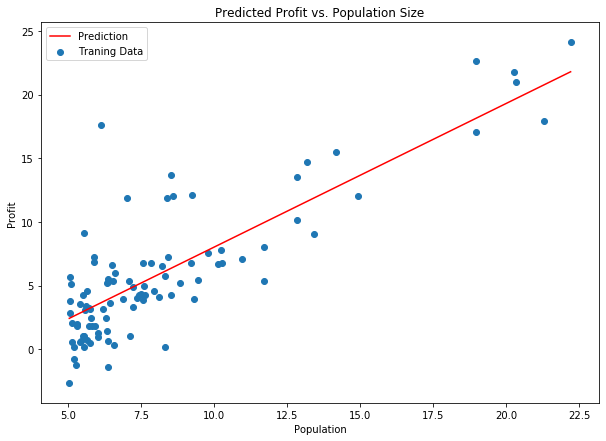

In [188]:
#TODO: to complete
x = np.linspace(data.Population.min(), data.Population.max(),100)
f = w_t[0,0] + w_t[0,1]*x

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Looks pretty good!  Since the gradient decent function also outputs a vector with the cost at each training iteration, we can plot that as well.  Notice that the cost always decreases - this is an example of a convex optimization problem.

Text(0.5, 1.0, 'Error vs. Training Epoch')

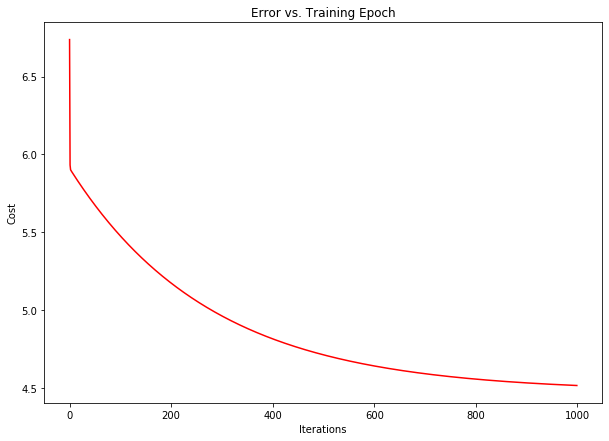

In [189]:
#TODO: plot the error vs. training epoch
fig, ax = plt.subplots(figsize=(10,7))
iterations = np.arange(iters)
ax.plot(iterations,cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

## Part 2: Linear regression with multiple variables

This exercise also included a housing price data set with 2 variables (size of the house in square feet and number of bedrooms) and a target (price of the house).  Let's use the techniques we already applied to analyze that data set as well.

In [190]:
!wget https://www.dropbox.com/s/5b5hnnnn8d4y2o5/ex1data2.txt?dl=0 \
   -O /content/drive/My\ Drive/Option_AI_2nd/ML/data/ex1data2.txt



/content/drive/My Drive/Option_AI_2nd/ML/data/ex1data2.txt: No such file or directory


The notebook will start by loading and displaying some values from this dataset. 

You then complete the code to:

	- Subtract the mean value of each feature from the dataset. 
	
	- After subtracting the mean, additionally scale (divide) the feature values by their respective “standard deviations.” 

In [191]:
path = os.getcwd() + '/data/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900

<font color='red'>Exercise: add another pre-processing step - normalizing the features. </font>

<font color='red'>Question: why is it necessary?  </font>
<font color='green'>Dans cet exercice, X contient 2 informations importantes : Size et Bedrooms. Afin que l'impact de Size sur Price ne soit pas prédominant devant celui de Bedrooms sur Price, Il est nécessaire de normaliser au préalable les données.</font>

	

In [192]:
##TODO, normalize your features
data2 = (data2 - data2.mean())/data2.var()


#Now show the normalized data
data2.head()

Size  Bedrooms         Price
0  0.000164 -0.293930  3.804760e-06
1 -0.000634 -0.293930 -6.723809e-07
2  0.000632 -0.293930  1.828422e-06
3 -0.000926 -2.020767 -6.933983e-06
4  0.001582  1.432907  1.275904e-05

Now let's repeat our pre-processing steps from part 1 and run the linear regression procedure on the new data set.

In [193]:
eta=0.01

# add ones column
data2.insert(0, 'Ones',np.ones(data2.shape[0]))

# set X (training data) and t (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
t2 = data2.iloc[:,cols-1:cols]

# convert to matrices
X2 = np.matrix(X2.values)
t2 = np.matrix(t2.values)

# initialize w
# TODO: what is shape of w? why?
w2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
w2, cost2 = gradientDescent(X2, t2, w2, eta, iters)

# get the cost (error) of the model
computeCost(X2, t2, w2)

2.517684128514474e-11

We can take a quick look at the training progess for this one as well.

Text(0.5, 1.0, 'Error vs. Training Epoch')

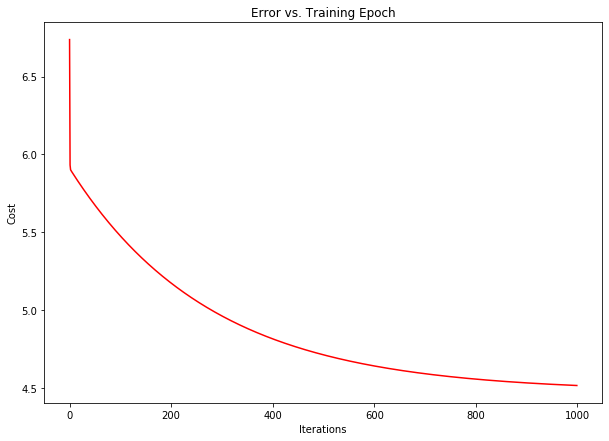

In [194]:
#TODO: plot the error vs. training epoch
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

<font color='red'>Question: What can you see from this figure ?</font>

<font color='green'>Answer: L'erreur décroît lorsque le nombre d'itérations augmente. Cependant, lorsque iterations tend vers l'infini, l'erreur tend à devenir constante. Il est dont nécessaire de trouver un compromis entre temps d'éxecution(complexité de temps) et erreur.  </font>



<font color='red'>Exercise: Try out different learning rates for the dataset and find a learning rate that converges quickly.</font>

#Instead of implementing these algorithms from scratch, we could also use scikit-learn's linear regression function.  Let's apply scikit-learn's linear regression algorithm to the data from part 1 and see what it comes up with.

In [195]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, t)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Here's what the scikit-learn model's predictions look like.

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

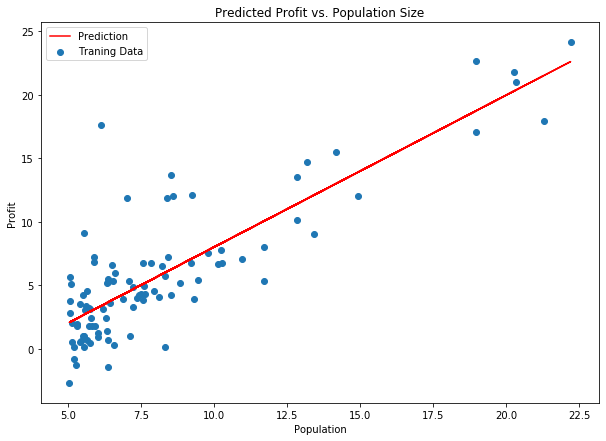

In [196]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

You can submit now your code via Moodle.
Do not forget to answer the questions!!!